<a href="https://colab.research.google.com/github/saman-azhar/face-mask-detection/blob/main/Face_Mask_Detection_VGG16Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author
#### *Saman Azhar*

# **Face Mask Detection**

Machine Learning program to detect the use of masks. The program was created using the CNN method with the VGG16Net architecture added with ResNet-10 and MTCNN face detection models.

In [1]:
!nvidia-smi

Sat May 21 13:17:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Getting Data and Repositories

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
% cd gdrive/MyDrive/face-detection-task

/content/gdrive/MyDrive/face-detection-task


In [5]:
!git clone https://github.com/Soedirman-Machine-Learning/face-mask-detection.git

fatal: destination path 'face-mask-detection' already exists and is not an empty directory.


In [6]:
%cd face-mask-detection

!ls

/content/gdrive/MyDrive/face-detection-task/face-mask-detection
'aplikasi android'
 Aplikasi-Android.gif
'berkas tugas akhir'
 dataset
 deploy.prototxt
 example_img
 face-detector.zip
 Face_Mask_Detection_MobileNetV2_with_MTCNN.ipynb
 Face_Mask_Detection_MobileNetV2_with_ResNet10.ipynb
 Face_Mask_Detection_VGG16Net_with_MTCNN.ipynb
 Face_Mask_Detection_VGG16Net_with_ResNet10.ipynb
 Full_Face_Mask_Detection_MobileNetV2.ipynb
 Full_Face_Mask_Detection_VGG16Net.ipynb
 logo-md1png.png
 mask_model.tflite
 model.tflite
 pengujian
 README.md
 res10_300x300_ssd_iter_140000.caffemodel
 saved_model


In [7]:
!unzip face-detector.zip

Archive:  face-detector.zip
replace deploy.prototxt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deploy.prototxt         
replace example_img/ex01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace example_img/ex01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex01.jpg    
replace example_img/ex02.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex02.jpg    
  inflating: example_img/ex03.jpg    
replace example_img/ex04.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex04.jpg    
replace example_img/ex05.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex05.jpg    
replace example_img/ex06.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex06.jpg    
replace example_img/ex07.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_img/ex07.jpg    
  inflating: example_img/ex08.jpg    
  inflating: example_img/ex09.jpg    
  inflat

## Importing Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import argparse
import os
import itertools
 
 
!pip install ipython-autotime
 
%load_ext autotime

y
time: 147 µs (started: 2022-05-21 13:20:09 +00:00)


In [9]:
print(tf.__version__)

2.8.0
time: 1.63 ms (started: 2022-05-21 13:20:09 +00:00)


## Preprocessing Datasets

In [11]:
INIT_LR = 1e-4
EPOCHS = 30
BS = 32
 

print("Input image...")
imagePaths = list(paths.list_images('dataset'))
data = []
labels = []
 

for imagePath in imagePaths:
 
    label = imagePath.split(os.path.sep)[-2]

    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
 
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)
 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print("Input image is successful")

Input image...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Input image is successful
time: 13min 19s (started: 2022-05-21 13:29:52 +00:00)


### Creating ImageDataGenerator and Data Augmentation objects

In [12]:
# Splitting Ratio ( 75% : 25% )
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
 
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

time: 3.37 s (started: 2022-05-21 13:43:12 +00:00)


## Creating a pre-trained CNN Network Model *(pre-trained convnets)*

In [13]:
baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

58900480/58889256 [==============================] - 0s 0us/step
time: 2.3 s (started: 2022-05-21 13:43:39 +00:00)


### *Feature Extraction*

Using pre-trained models for feature extraction

In [14]:
baseModel.trainable = False
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Building Model

In [15]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
 
model = Model(inputs=baseModel.input, outputs=headModel)
 
for layer in baseModel.layers:
    layer.trainable = False
 
print("Compiling models...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

model.summary()

Compiling models...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training Model

In [16]:
print("Training model...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Training model...
Epoch 1/30
95/95 [==============================] - 62s 503ms/step - loss: 1.2287 - accuracy: 0.7264 - val_loss: 0.1789 - val_accuracy: 0.9583
Epoch 2/30
95/95 [==============================] - 40s 416ms/step - loss: 0.4208 - accuracy: 0.8949 - val_loss: 0.0822 - val_accuracy: 0.9831
Epoch 3/30
95/95 [==============================] - 39s 410ms/step - loss: 0.2510 - accuracy: 0.9410 - val_loss: 0.0572 - val_accuracy: 0.9870
Epoch 4/30
95/95 [==============================] - 39s 410ms/step - loss: 0.1862 - accuracy: 0.9519 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 5/30
95/95 [==============================] - 39s 409ms/step - loss: 0.1408 - accuracy: 0.9628 - val_loss: 0.0432 - val_accuracy: 0.9896
Epoch 6/30
95/95 [==============================] - 39s 408ms/step - loss: 0.1147 - accuracy: 0.9700 - val_loss: 0.0380 - val_accuracy: 0.9896
Epoch 7/30
95/95 [==============================] - 39s 412ms/step - loss: 0.0881 - accuracy: 0.9773 - val_loss: 0.0340 - va

### Visualizations

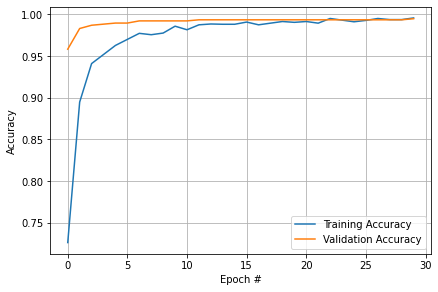

time: 205 ms (started: 2022-05-21 14:04:09 +00:00)


In [17]:
N = EPOCHS
fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)
 
plt.subplot(2, 2, 1)
plt.plot(np.arange(0, N), H.history["accuracy"],label = "Training Accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")

plt.grid(zorder = 0)

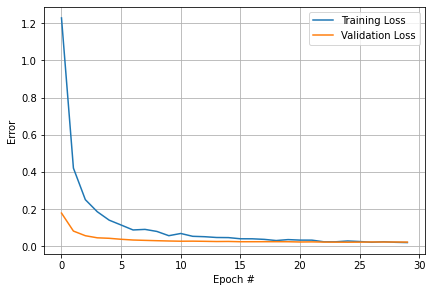

time: 137 ms (started: 2022-05-21 14:04:10 +00:00)


In [18]:
N = EPOCHS
fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)
 
plt.subplot(2, 2, 2)
plt.plot(np.arange(0, N), H.history["loss"],label = "Training Loss")
plt.plot(np.arange(0, N), H.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Error")

plt.grid(zorder = 0)
plt.show()

In [19]:
print(model.metrics_names)

print(model.evaluate(x= testX, y = testY))

['loss', 'accuracy']
24/24 [==============================] - 7s 280ms/step - loss: 0.0228 - accuracy: 0.9948
[0.022808682173490524, 0.9947848916053772]
time: 10.8 s (started: 2022-05-21 14:04:10 +00:00)


In [20]:
yTrue = np.argmax(testY, axis=1)

YPred = model.predict(testX, batch_size=BS)
yPred = np.argmax(YPred, axis=1)

print(yTrue)
print(yPred)

[0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 0 1 1 1 0 0 1 1 

### *Confusion Matrix*

In [21]:
def get_confusion_matrix(yTrue, yPred):
    n_classes = len(np.unique(yTrue)) 
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(yTrue, yPred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

time: 3.08 ms (started: 2022-05-21 14:04:26 +00:00)


In [22]:
conf = get_confusion_matrix(yTrue, yPred)
conf

array([[381,   2],
       [  2, 382]])

time: 4.52 ms (started: 2022-05-21 14:04:26 +00:00)


Text(0.5, 15.0, 'Prediction Label')

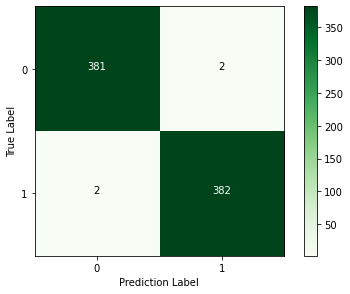

time: 268 ms (started: 2022-05-21 14:04:26 +00:00)


In [23]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)

plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Prediction Label')

In [24]:
TP = true_pos = 381
TN = true_neg = 382
FP = false_pos = 2
FN = false_neg = 2

time: 9.6 ms (started: 2022-05-21 14:06:21 +00:00)


In [25]:
results = {}

# Accuracy
metric = "Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} = {results[metric]: .3f}")

# Recall
metric = "Recall"
results[metric] = TP / (TP + FN)
print(f"{metric} = {results[metric]: .3f}")

# Precision
metric = "Precision"
results[metric] = TP / (TP + FP)
print(f"{metric} = {results[metric]: .3f}")

# F1
metric = "F1"
results[metric] = 2 / (1 / results["Precision"] + 1 / results["Recall"])
print(f"{metric} = {results[metric]: .3f}")

Accuracy =  0.995
Recall =  0.995
Precision =  0.995
F1 =  0.995
time: 9.71 ms (started: 2022-05-21 14:06:24 +00:00)


In [26]:
predIdxs = model.predict(testX, batch_size=BS)
 
predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767

time: 5.52 s (started: 2022-05-21 14:06:26 +00:00)


## Convert Model to ".tflite"

In [27]:
export_dir='saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets
time: 4.01 s (started: 2022-05-21 14:06:34 +00:00)


In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

time: 1.53 s (started: 2022-05-21 14:06:38 +00:00)


In [29]:
tflite_model_file = pathlib.Path('model.tflite')

tflite_model_file.write_bytes(tflite_model)

59130924

time: 2.59 s (started: 2022-05-21 14:06:39 +00:00)


In [30]:
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']

print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 54, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
time: 92.2 ms (started: 2022-05-21 14:06:42 +00:00)


## Model Testing with ResNet10 SSD

The model was tested on images and in real-time using res10_300x300_ssd_iter_14000.caffemodel and deploy.protoxt which were used to detect faces.

In [31]:
import cv2
from google.colab.patches import cv2_imshow

time: 2.12 ms (started: 2022-05-21 14:07:10 +00:00)


Detecting Faces...


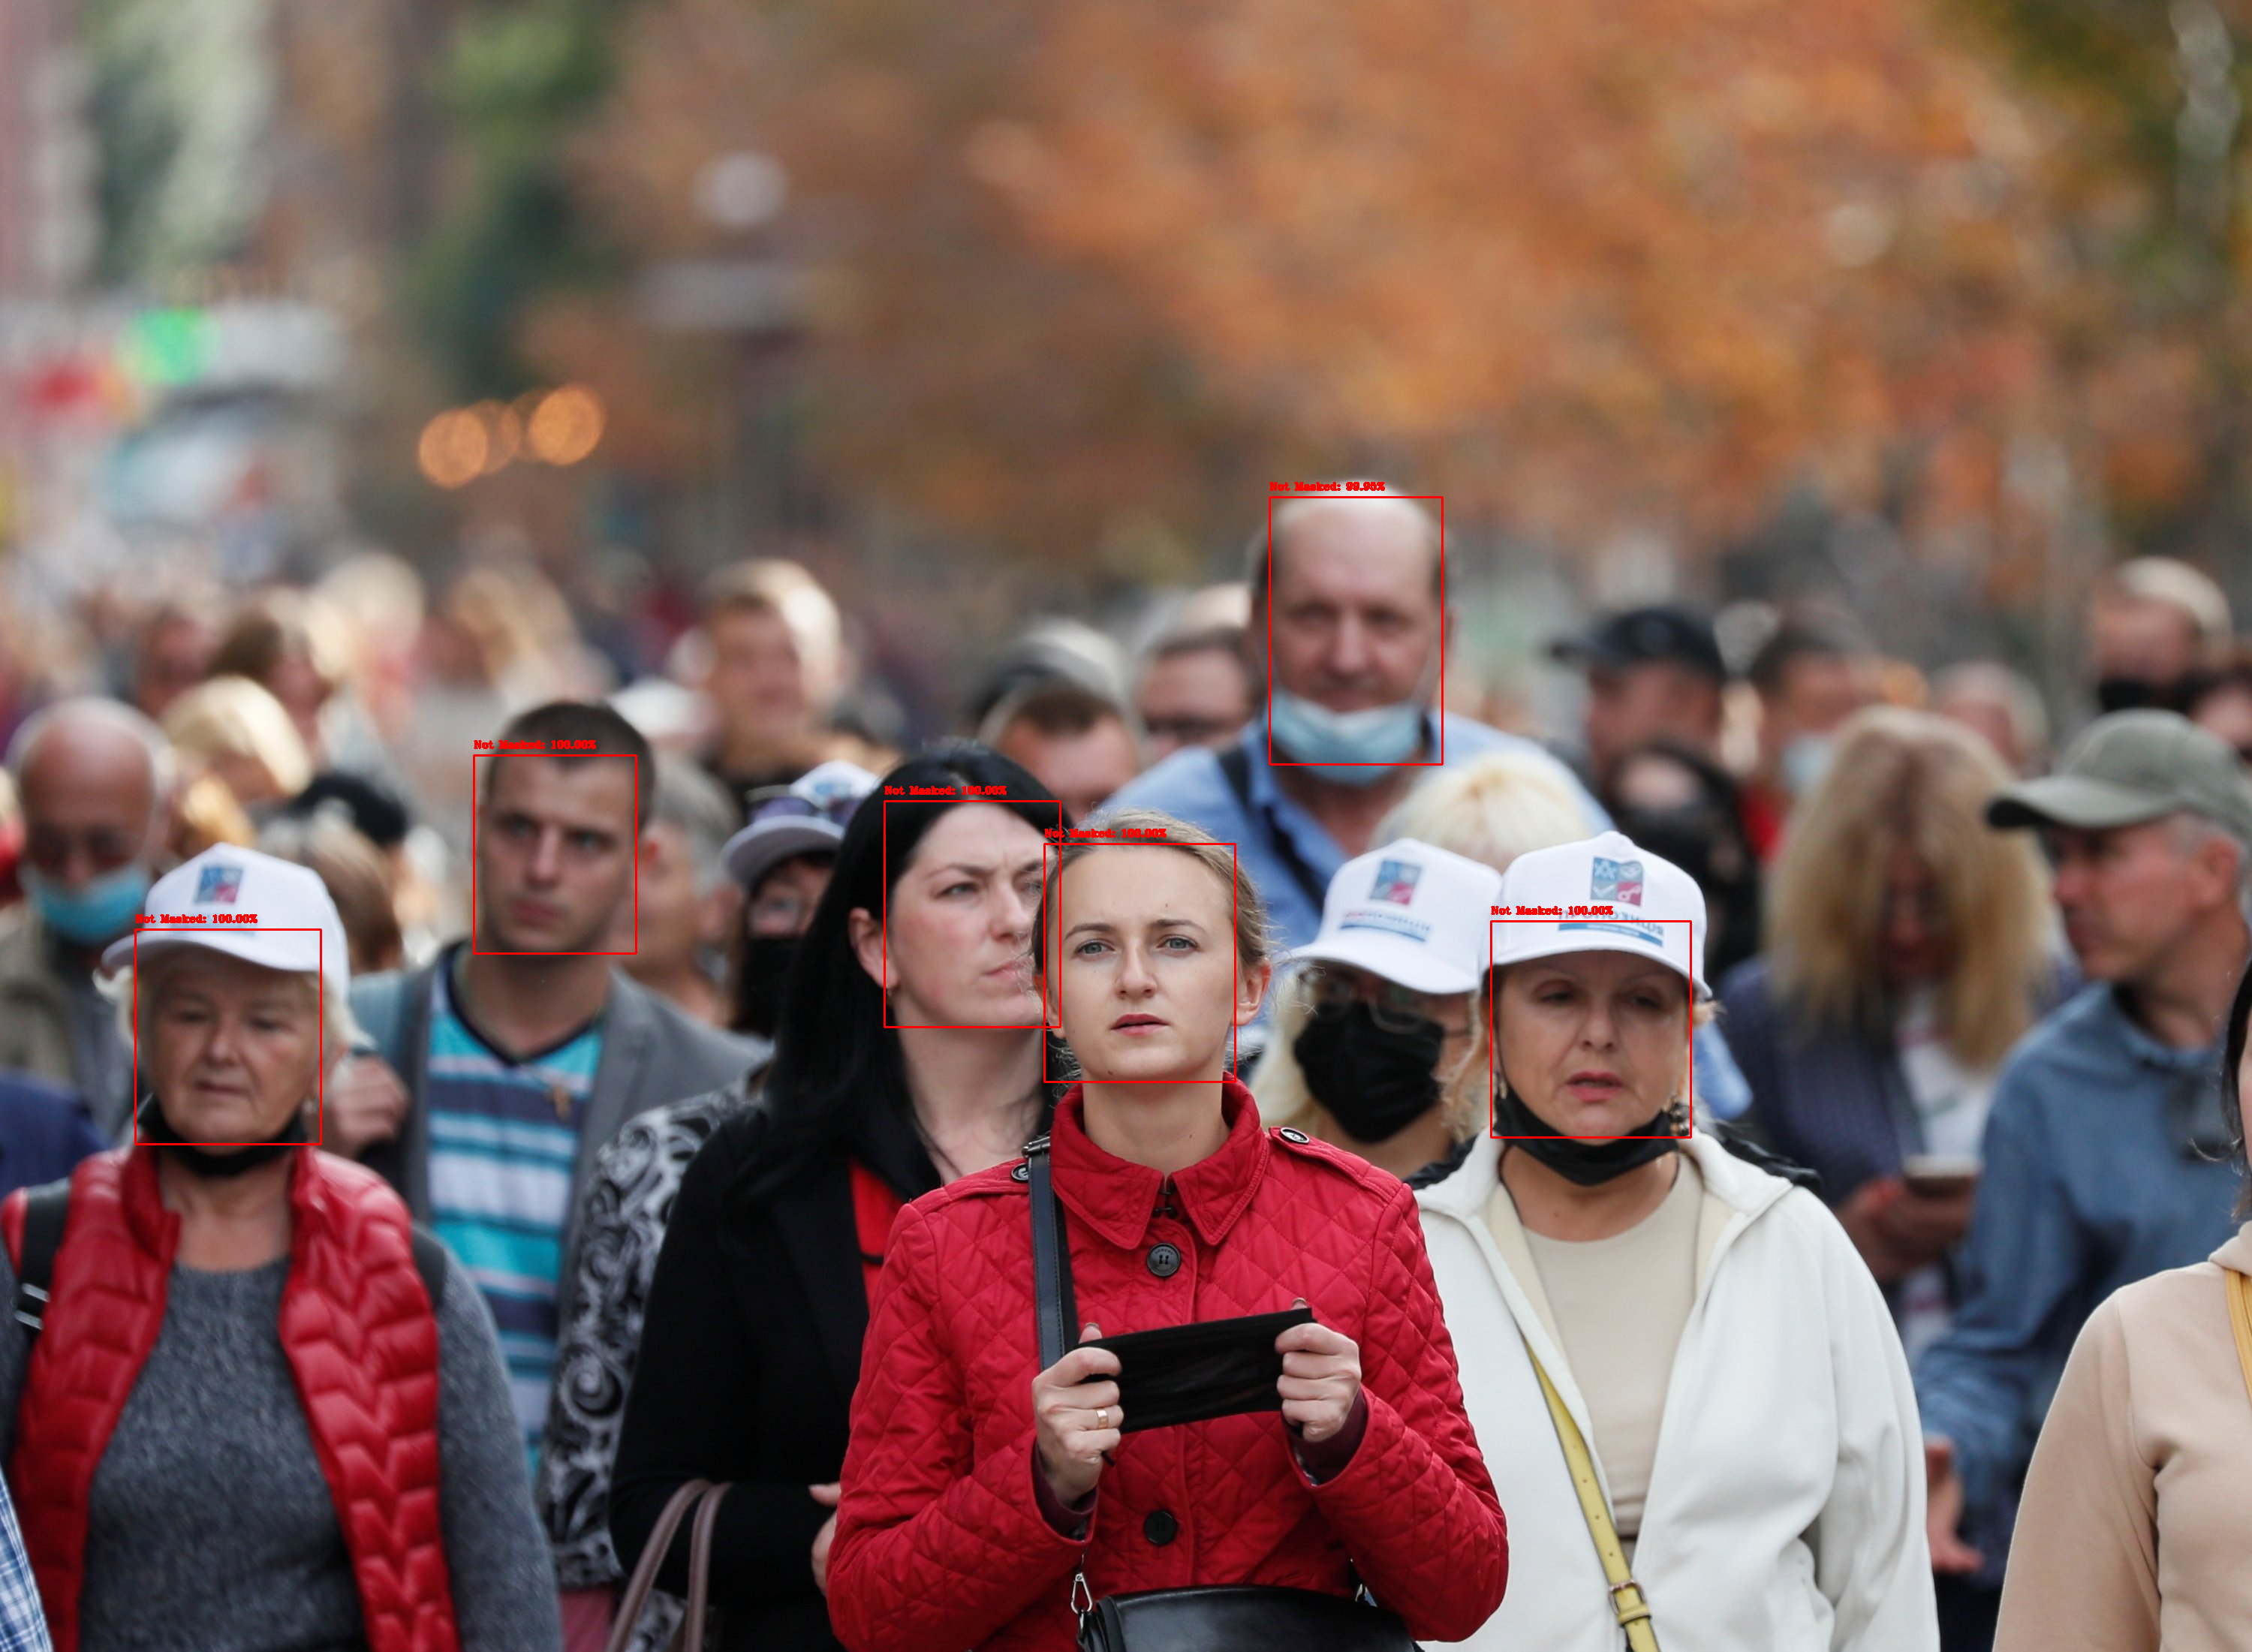

-1

time: 4.78 s (started: 2022-05-21 14:07:15 +00:00)


In [32]:
image = cv2.imread('example_img/ex02.jpg')
orig = image.copy()
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

net=cv2.dnn.readNet('deploy.prototxt','res10_300x300_ssd_iter_140000.caffemodel')

print("Detecting Faces...")
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
	confidence = detections[0, 0, i, 2]

	if confidence > 0.5:
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)

		(mask, withoutMask) = model.predict(face)[0]

		label = "Masked" if mask > withoutMask else "Not Masked"
		color = (0, 255, 0) if label == "Masked" else (0, 0, 255)

		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		cv2.putText(image, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_TRIPLEX, 0.45, color, 2)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

cv2_imshow(image)
cv2.waitKey(0)

### Perframe Capture Detection Test

In [39]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import os
 
def detect_and_predict_mask(frame, faceNet, maskNet):

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
        (104.0, 177.0, 123.0))

    faceNet.setInput(blob)
    detections = faceNet.forward()
 
    faces = []
    locs = []
    preds = []
 
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
 
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
 
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            faces.append(face)
            locs.append((startX, startY, endX, endY))
 
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)
 
    return (locs, preds)
 
faceNet=cv2.dnn.readNet('deploy.prototxt','res10_300x300_ssd_iter_140000.caffemodel')

time: 62.6 ms (started: 2022-05-21 14:13:53 +00:00)


In [40]:
import base64
import html
import io
import time
import imutils
 
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2
 
def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'click here or on the video to quit the demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')
 
  display(js)
  
def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

time: 23.8 ms (started: 2022-05-21 14:13:58 +00:00)


In [41]:
def js_reply_to_image(js_reply):
    """
    input: 
          js_reply: JavaScript object, contain image from webcam
    output: 
          image_array: image array RGB size 512 x 512 from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)
 
    return image_array

time: 3.38 ms (started: 2022-05-21 14:14:03 +00:00)


In [42]:
start_input()
label_html = 'Capturing...'
img_data = ''
start_time = time.time()
frame_count = 0 

from google.colab.patches import cv2_imshow
while True:
  js_reply = take_photo(label_html, img_data)
  if not js_reply:
    break
    
  image = js_reply_to_image(js_reply)
  frame_count += 1 # for fps

  frame = image
  v=True
  if v == True:

    frame = imutils.resize(frame, width=400)

    (locs, preds) = detect_and_predict_mask(frame, faceNet, model)
    for (box, pred) in zip(locs, preds):

      (startX, startY, endX, endY) = box
      (mask, withoutMask) = pred

      label = "Masked" if mask > withoutMask else "Not Masked"
      color = (0, 255, 0) if label == "Masked" else (0, 0, 255)

      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

      frame=cv2.putText(frame, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      frame=cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

      elapsed_time = time.time() - start_time
      fps = frame_count / elapsed_time
      cv2.putText(img=frame, text='FPS : ' + str(round(fps,2)), org=(10, 20), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255,255,255), thickness=1)

      cv2_imshow(frame)

<IPython.core.display.Javascript object>

time: 34.3 s (started: 2022-05-21 14:14:06 +00:00)


### Video Streaming Test

In [62]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

time: 2.06 ms (started: 2022-05-21 14:34:45 +00:00)


In [63]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

time: 6.79 ms (started: 2022-05-21 14:34:47 +00:00)


In [64]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

time: 22.1 ms (started: 2022-05-21 14:34:50 +00:00)


In [65]:
 def detect_and_predict_mask(img, faceNet, maskNet):
    (h, w) = img.shape[:2]
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300),
        (104.0, 177.0, 123.0))

    faceNet.setInput(blob)
    detections = faceNet.forward()

    faces = []
    locs = []
    preds = []
 
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
 
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
 
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            faces.append(face)
            locs.append((startX, startY, endX, endY))
 
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)
 
    return (locs, preds)
 
faceNet=cv2.dnn.readNet('deploy.prototxt','res10_300x300_ssd_iter_140000.caffemodel')

time: 52.9 ms (started: 2022-05-21 14:35:15 +00:00)


In [66]:
video_stream()

label_html = 'Capturing...'
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])

    bbox_array = np.zeros([512,512,4], dtype=np.uint8)

    (locs, preds) = detect_and_predict_mask(img, faceNet, model)
    for (box, pred) in zip(locs, preds):

      (startX, startY, endX, endY) = box
      (mask, withoutMask) = pred

      label = "Masked" if mask > withoutMask else "Not Masked"
      color = (0, 255, 0) if label == "Masked" else (255, 0, 0)

      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

      bbox_array=cv2.putText(bbox_array, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      bbox_array=cv2.rectangle(bbox_array, (startX, startY), (endX, endY), color, 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

    bbox_bytes = bbox_to_bytes(bbox_array)

    bbox = bbox_bytes

<IPython.core.display.Javascript object>

time: 4min 35s (started: 2022-05-21 14:35:19 +00:00)


# Conclusion

ResNet10 SSD shows promising results given lighting is good and the subject isn't moving too much.

*This project is done as part of my internship at Sparks Foundation* 

